# Missing value imputation: CategoricalImputer


CategoricalImputer performs imputation of categorical variables. It replaces missing values by an arbitrary label "Missing" (default) or any other label entered by the user. Alternatively, it imputes missing data with the most frequent category.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

[Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3](http://jse.amstat.org/v19n3/decock.pdf)

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Version

In [1]:
# Make sure you are using this 
# Feature-engine version.

import feature_engine

feature_engine.__version__

'1.2.0'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from  feature_engine.imputation import CategoricalImputer

## Load data

In [3]:
# Download the data from Kaggle and store it
# in the same folder as this notebook.

data = pd.read_csv('houseprice.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Separate the data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

## Check missing data

In [5]:
# These are categorical variables with missing data

X_train[['Alley', 'MasVnrType']].isnull().mean()

Alley         0.939335
MasVnrType    0.004892
dtype: float64

Text(0.5, 1.0, 'MasVnrType')

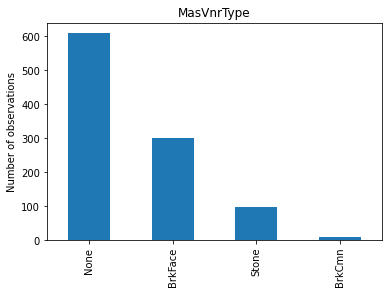

In [6]:
# Number of observations per category

X_train['MasVnrType'].value_counts().plot.bar()
plt.ylabel('Number of observations')
plt.title('MasVnrType')

## Imputat with string missing

We replace missing data with the string "Missing".

In [7]:
imputer = CategoricalImputer(
    imputation_method='missing',
    variables=['Alley', 'MasVnrType'])

imputer.fit(X_train)

CategoricalImputer(variables=['Alley', 'MasVnrType'])

In [8]:
# We impute all variables with the
# string 'Missing'

imputer.imputer_dict_

{'Alley': 'Missing', 'MasVnrType': 'Missing'}

In [9]:
# Perform imputation.

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

Text(0.5, 1.0, 'Imputed MasVnrType')

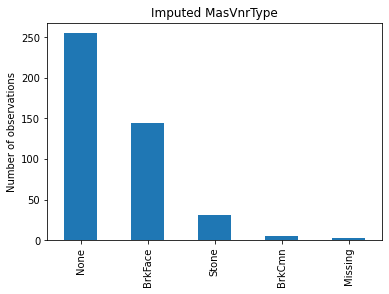

In [10]:
# Observe the new category 'Missing'

test_t['MasVnrType'].value_counts().plot.bar()

plt.ylabel('Number of observations')
plt.title('Imputed MasVnrType')

Text(0.5, 1.0, 'Imputed Alley')

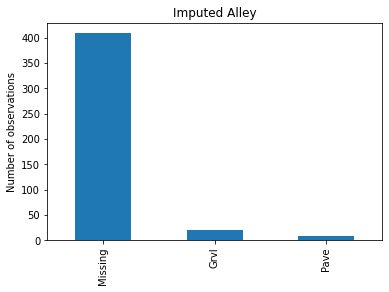

In [11]:
test_t['Alley'].value_counts().plot.bar()

plt.ylabel('Number of observations')
plt.title('Imputed Alley')

## Impute with another string

We can also enter a specific string for the imputation instead of the default 'Missing'.

In [12]:
imputer = CategoricalImputer(
    variables='MasVnrType',
    fill_value="this_is_missing",
)

In [13]:
# We can also fit and transform the train set
# in one line of code
train_t = imputer.fit_transform(X_train)

In [14]:
# and then transform the test set
test_t = imputer.transform(X_test)

In [15]:
# let's check the current imputation
# dictionary

imputer.imputer_dict_

{'MasVnrType': 'this_is_missing'}

Text(0.5, 1.0, 'Imputed MasVnrType')

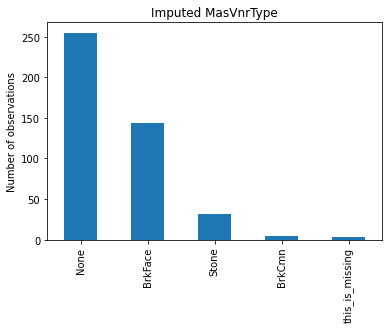

In [16]:
# After the imputation we see the new category

test_t['MasVnrType'].value_counts().plot.bar()

plt.ylabel('Number of observations')
plt.title('Imputed MasVnrType')

## Frequent Category Imputation

We can also replace missing values with the most frequent category.

In [17]:
imputer = CategoricalImputer(
    imputation_method='frequent',
    variables=['Alley', 'MasVnrType'],
)

In [18]:
# Find most frequent category

imputer.fit(X_train)

CategoricalImputer(imputation_method='frequent',
                   variables=['Alley', 'MasVnrType'])

In [19]:
# In this attribute we find the most frequent category
# per variable to impute.

imputer.imputer_dict_

{'Alley': 'Pave', 'MasVnrType': 'None'}

In [20]:
# Impute variables
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

In [21]:
# Let's count the number of observations per category
# in the original variable.

X_train['MasVnrType'].value_counts()

None       609
BrkFace    301
Stone       97
BrkCmn      10
Name: MasVnrType, dtype: int64

In [22]:
# note that we have a few more observations in the 
# most frequent category, which for this variable
# is 'None', after the transformation.

train_t['MasVnrType'].value_counts()

None       614
BrkFace    301
Stone       97
BrkCmn      10
Name: MasVnrType, dtype: int64

The number of observations for `None` in `MasVnrType` increased from 609 to 614, thanks to replacing the NA with this label.

## Automatically select categorical variables

We can impute all catetgorical variables automatically, either with a string or with the most frequent category.

To do so, we need to leave the parameter `variables` to `None`.

In [23]:
# Impute all categorical variables with 
# the most frequent category

imputer = CategoricalImputer(imputation_method='frequent')

In [24]:
# with fit, the transformer identifies the categorical variables
# in the train set, and their most frequent category.
imputer.fit(X_train)

# Here we find the imputation values for each
# categorical variable.

imputer.imputer_dict_

{'MSZoning': 'RL',
 'Street': 'Pave',
 'Alley': 'Pave',
 'LotShape': 'Reg',
 'LandContour': 'Lvl',
 'Utilities': 'AllPub',
 'LotConfig': 'Inside',
 'LandSlope': 'Gtl',
 'Neighborhood': 'NAmes',
 'Condition1': 'Norm',
 'Condition2': 'Norm',
 'BldgType': '1Fam',
 'HouseStyle': '1Story',
 'RoofStyle': 'Gable',
 'RoofMatl': 'CompShg',
 'Exterior1st': 'VinylSd',
 'Exterior2nd': 'VinylSd',
 'MasVnrType': 'None',
 'ExterQual': 'TA',
 'ExterCond': 'TA',
 'Foundation': 'PConc',
 'BsmtQual': 'TA',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'Unf',
 'BsmtFinType2': 'Unf',
 'Heating': 'GasA',
 'HeatingQC': 'Ex',
 'CentralAir': 'Y',
 'Electrical': 'SBrkr',
 'KitchenQual': 'TA',
 'Functional': 'Typ',
 'FireplaceQu': 'Gd',
 'GarageType': 'Attchd',
 'GarageFinish': 'Unf',
 'GarageQual': 'TA',
 'GarageCond': 'TA',
 'PavedDrive': 'Y',
 'PoolQC': 'Gd',
 'Fence': 'MnPrv',
 'MiscFeature': 'Shed',
 'SaleType': 'WD',
 'SaleCondition': 'Normal'}

In [25]:
# With transform we replace missing data.

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

In [26]:
# Sanity check:

# No categorical variable with NA is left in the
# transformed data.

[v for v in train_t.columns if train_t[v].dtypes ==
    'O' and train_t[v].isnull().sum() > 1]

[]

In [27]:
# We can also return the name of the final features in
# the transformed data
imputer.get_feature_names_out()

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc